## Importing the modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Custom utilities for working with weather data
from utils_weather import isna_stats, notna_column

In [3]:
df = pd.read_pickle("data/data-2.pkl")
df.shape

(145460, 23)

In [4]:
df.info(verbose=False, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Columns: 23 entries, Date to RainTomorrow
dtypes: datetime64[ns](1), float64(16), object(6)
memory usage: 68.2 MB


In [5]:
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


In [6]:
df.duplicated(['Date', 'Location']).sum()

0

In [7]:
fullness = df.notna().sum(axis=1)
fullness.value_counts(sort=False)[:7]

2    182
3     15
4     96
5     56
6    107
7     59
8     82
dtype: int64

In [8]:
check = df.loc[fullness == 5]
check.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
15203,2009-04-07,Newcastle,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
15214,2009-04-18,Newcastle,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes
15363,2009-09-14,Newcastle,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
15364,2009-09-15,Newcastle,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
15365,2009-09-16,Newcastle,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No


In [9]:
check.count()

Date             56
Location         56
MinTemp           5
MaxTemp           8
Rainfall         46
Evaporation       1
Sunshine          0
WindGustDir       2
WindGustSpeed     3
WindDir9am        0
WindDir3pm        2
WindSpeed9am      0
WindSpeed3pm      2
Humidity9am       0
Humidity3pm       1
Pressure9am       1
Pressure3pm       1
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           1
RainToday        46
RainTomorrow     49
dtype: int64

In [10]:
isna_stats(df, n=7)

Sunshine       48.01 %
Evaporation    43.17 %
Cloud3pm       40.81 %
Cloud9am       38.42 %
Pressure9am    10.36 %
Pressure3pm    10.33 %
WindDir9am      7.26 %
dtype: object

In [11]:
check = isna_stats(df, more_than=35).index.tolist()
check

['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']

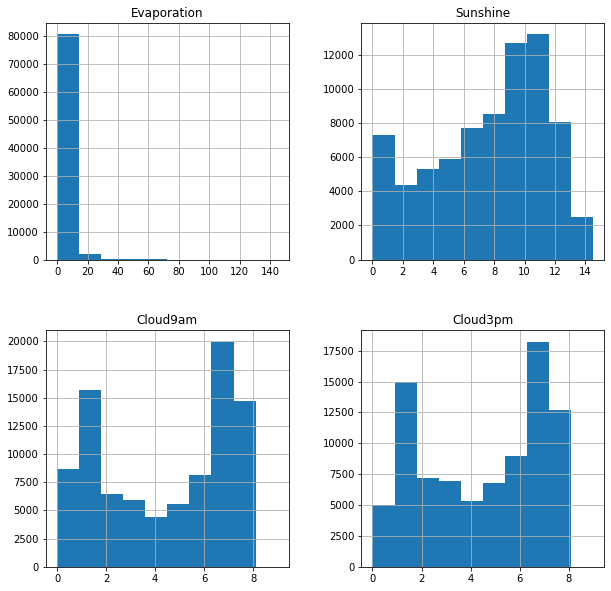

In [12]:
df[check].hist(figsize=(10, 10))
plt.show()

In [13]:
notna_column(df, 'Evaporation', period='year', total=True)[::3]

Date,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Total
Location,,,,,,,,,,,,
Sydney,0,330,363,361,328,331,333,362,355,361,169,3293
Hobart,0,184,364,364,334,335,337,364,362,366,176,3186
PerthAirport,0,0,365,365,335,335,336,365,365,366,176,3008
SydneyAirport,0,0,363,361,328,331,333,362,355,361,169,2963
Nuriootpa,0,0,309,352,334,332,334,349,351,357,169,2887
NorfolkIsland,0,0,363,364,327,328,330,362,360,279,62,2775
Cobar,0,0,361,364,319,318,321,349,353,281,0,2666
Portland,0,0,365,365,328,333,335,363,363,148,0,2600
Williamtown,0,0,358,341,224,186,193,204,226,214,0,1946


In [14]:
notna_column(df, 'Sunshine', period='year', total=True)[::3]

Date,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Total
Location,,,,,,,,,,,,
Sydney,0,335,362,364,335,331,337,364,362,362,176,3328
Perth,0,184,364,365,332,335,337,364,365,366,176,3188
MelbourneAirport,0,0,365,364,335,335,337,365,365,366,176,3008
PearceRAAF,0,0,364,365,332,335,337,364,365,366,176,3004
Nuriootpa,0,0,290,355,332,331,327,351,349,343,170,2848
WaggaWagga,0,0,361,364,335,335,337,365,362,116,0,2575
Dartmoor,0,0,365,365,331,331,335,361,365,113,0,2566
AliceSprings,0,31,358,341,331,322,331,352,353,101,0,2520
Sale,0,0,346,364,334,323,332,119,0,0,0,1818


In [15]:
notna_column(df, 'Cloud9am', period='year', total=True)[::3]

Date,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Total
Location,,,,,,,,,,,,
Brisbane,0,184,365,365,335,335,337,364,365,366,176,3192
Watsonia,0,0,365,365,335,335,337,365,365,366,176,3009
SydneyAirport,0,0,365,365,335,335,337,365,364,365,174,3005
MountGambier,0,31,365,365,333,334,335,365,363,312,127,2930
Townsville,0,31,365,365,335,335,337,365,365,270,98,2866
WaggaWagga,0,0,363,364,334,334,335,364,361,266,65,2786
Sale,0,0,362,364,335,325,332,364,233,249,87,2651
Portland,0,0,359,358,329,301,236,260,307,307,140,2597
Williamtown,0,0,363,352,279,245,254,283,310,210,111,2407


In [16]:
notna_column(df, 'Cloud3pm', period='year', total=True)[::3]

Date,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Total
Location,,,,,,,,,,,,
Brisbane,0,184,365,365,335,333,337,365,365,366,176,3191
SydneyAirport,0,0,365,365,335,335,337,365,365,366,176,3009
PerthAirport,0,0,363,364,335,335,337,365,364,366,176,3005
Mildura,0,0,362,360,332,327,327,364,348,314,127,2861
Sydney,0,335,365,319,0,153,337,365,365,366,176,2781
AliceSprings,0,31,354,345,318,319,320,353,355,228,56,2679
Portland,0,0,346,349,313,289,243,233,294,290,133,2490
Albany,0,30,362,365,335,332,335,361,209,0,0,2329
CoffsHarbour,0,0,364,364,331,328,327,115,149,154,99,2231


In [17]:
notna_column(df, 'Pressure9am', period='year', total=True)[::3]

Date,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Total
Location,,,,,,,,,,,,
Sydney,0,334,363,349,335,335,337,364,365,366,175,3323
Brisbane,0,184,365,364,335,335,337,365,365,366,176,3192
Adelaide,0,183,364,365,335,334,337,365,360,366,176,3185
Cairns,0,31,365,365,335,335,337,365,365,365,176,3039
Albury,0,31,365,365,332,335,337,363,365,366,176,3035
Ballarat,0,31,357,362,331,334,337,365,357,366,176,3016
MelbourneAirport,0,0,365,365,335,335,337,365,365,366,176,3009
PerthAirport,0,0,365,365,334,335,337,365,364,366,176,3007
NorfolkIsland,0,0,364,364,334,335,337,364,363,364,176,3001


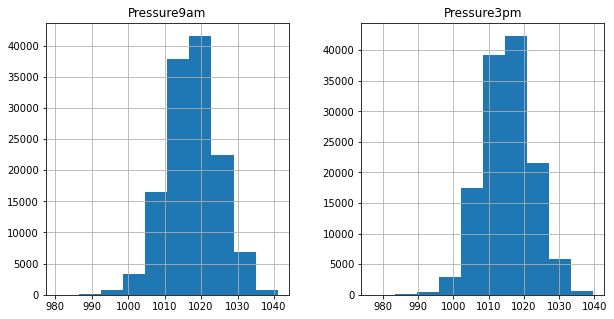

In [18]:
df[['Pressure9am', 'Pressure3pm']].hist(figsize=(10, 5))
plt.show()